# Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.

# Импорт необходимых библиотек для работы с распознаванием цифр
В этом блоке подключаются модули, необходимые для загрузки обучающего датасета и создания нейронной сети:

- from tensorflow.keras.datasets import mnist — загрузка встроенного набора данных MNIST с изображениями рукописных цифр (28×28 пикселей).

- from tensorflow.keras import utils — утилиты Keras, включая to_categorical для one-hot кодирования меток.

- from tensorflow.keras.models import Sequential — используется для создания модели нейронной сети типа "последовательная".

- from tensorflow.keras.layers import Dense — импорт слоя плотных (полносвязных) нейронов.

- import numpy as np — работа с массивами и матрицами (NumPy — основной инструмент для обработки числовых данных).

In [1]:
import numpy as np                           # Работа с массивами
import os                                   # Работа с файловой системой
import warnings                             # Подавление предупреждений
from tensorflow.keras import utils          # Утилиты Keras (to_categorical и др.)
from tensorflow.keras.datasets import mnist # Загрузка датасета MNIST
from tensorflow.keras.layers import Dense   # Полносвязный слой
from tensorflow.keras.models import Sequential  # Создание нейросети

# Отключаем предупреждения, чтобы не мешали выводу
warnings.filterwarnings('ignore')

# Подготовка данных из набора MNIST
В этом блоке производится загрузка и предварительная обработка изображений рукописных цифр из набора MNIST:

Происходи загрузка данных:
- mnist.load_data() загружает обучающую и тестовую выборки, содержащие изображения (размером 28×28 пикселей) и соответствующие им метки.

Изменение формы входных данных:
- Изображения преобразуются в векторы длиной 784 (28×28) с помощью reshape, чтобы передать их в полносвязную нейронную сеть.

Нормализация:
- Все пиксели приводятся к диапазону [0, 1], делением на 255, и тип данных меняется на float32.

Преобразование меток:
- Метки классов (y_train и y_test) переводятся в формат one-hot encoding, где каждая цифра представляется как вектор из 10 элементов (по числу классов от 0 до 9).

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype("float32") / 255.0

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype("float32") / 255.0

CLASS_COUNT = 10


# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Создание и компиляция нейронной сети для распознавания цифр
В этом блоке формируется архитектура нейронной сети и её подготовка к обучению:

Выполняется моздание модели, используется последовательная модель Sequential, где слои добавляются один за другим.

Полносвязные слои:

- Первый скрытый слой содержит 800 нейронов с активацией ReLU и принимает на вход векторы длиной 784 (28×28 пикселей, развернутые в вектор).

- Второй скрытый слой — 400 нейронов с активацией ReLU, что помогает модели учиться сложным представлениям.

Выходной слой:
- Состоит из 10 нейронов (по числу классов от 0 до 9), использует функцию активации softmax для получения вероятностей классов.

Далее выполняется компиляция:
- Используется функция потерь categorical_crossentropy (подходит для многоклассовой классификации), оптимизатор Adam и метрика точности (accuracy).

In [17]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation="relu"))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation="relu"))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation="softmax"))

# Компиляция модели
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Обучение нейронной сети
В данном блоке происходит процесс обучения модели на подготовленных данных:

Входные данные:
- Используются нормализованные векторы изображений x_train и соответствующие one-hot метки y_train.

Параметры обучения:

- batch_size=128 — сеть обновляет веса после обработки каждого батча из 128 примеров.

- epochs=15 — модель проходит 15 полных циклов по всему набору данных.

- verbose=1 — вывод подробной информации о ходе обучения в консоль.


In [18]:
model.fit(
    x_train,  # обучающая выборка, входные данные
    y_train,  # обучающая выборка, выходные данные
    batch_size=128,  # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
    epochs=15,  # количество эпох, когда нейронка обучается на всех примерах выборки
    verbose=1,
)  # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8892 - loss: 0.3750
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9745 - loss: 0.0811
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0474
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0324
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0236
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0211
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0166
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0136
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9967 - loss: 0.0102
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0120
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9961 - loss: 0.0123
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Далее были реализованы операции по сохранению и восстановлению обученных параметров нейронной сети:

Сохранение весов:
- model.save_weights("dz_ultra_pro.weights.h5") — сохраняет текущие веса модели в файл с расширением .h5. Это удобно для последующего использования без необходимости повторного обучения.

Загрузка весов:
- model.load_weights("dz_ultra_pro.weights.h5") — загружает сохранённые веса из файла, позволяя восстановить состояние модели и сразу использовать её для предсказаний или дальнейшего обучения.

In [19]:
model.save_weights("dz_ultra_pro.weights.h5")
model.load_weights("dz_ultra_pro.weights.h5")

Далее подключаются необходимые инструменты для работы с изображениями и подключения к Google Диску:

- from tensorflow.keras.preprocessing import image — загрузка и предобработка изображений.

- import matplotlib.pyplot as plt — библиотека для визуализации изображений и графиков.

- from google.colab import drive и drive.mount('/content/drive') — монтирование Google Диска для загрузки и сохранения файлов в среде Google Colaboratory.

In [20]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка, предобработка и визуализация пользовательского изображения
В этом блоке происходит подготовка рукописной цифры, загруженной с Google Диска, для распознавания:

- image.load_img() загружает фото по пути img_path, масштабируя его до размера 28×28 пикселей и переводя в оттенки серого.

- Преобразование в массив: image.img_to_array() конвертирует изображение в числовой массив.

- Инверсия цветов: для правильного распознавания цвета цифры и фона цвета инвертируются: белый становится чёрным и наоборот (255 - img_array).

- Пороговая фильтрация: пиксели с интенсивностью ниже 150 устанавливаются в 0 — это помогает убрать шумы и выделить фигуру.

- Визуализация: отображение обработанного изображения с помощью plt.imshow() в оттенках серого.

- Подготовка к модели: массив преобразуется в вектор, нормируется (деление на 255) и приводится к типу float32 для подачи в нейронную сеть.

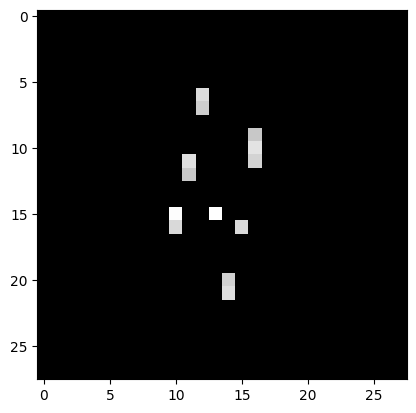

In [21]:
img_path = "/content/drive/My Drive/Evdakov_1_Laba/image1.jpg"
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = 255 - img_array
img_array = np.where(img_array < 150, 0, img_array)
plt.imshow(img_array, cmap="gray")
img_train = img_array.reshape(1, -1).astype("float32")  / 255.0

Предсказание класса рукописной цифры.

Прогнозирование: model.predict(img_train) вычисляет вероятности для каждого из 10 классов (цифр от 0 до 9).

Определение класса: np.argmax(prediction) выбирает класс с максимальной вероятностью — это и есть распознанная цифра.

In [22]:
prediction = model.predict(img_train)
predicted_class = np.argmax(prediction)
print("Распознанная цифра:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Распознанная цифра: 4


# Вывод по заданию
В данном задании была создана и обучена глубокая нейронная сеть для распознавания рукописных цифр из набора MNIST. Модель успешно справилась с задачей классификации, достигнув высокой точности благодаря использованию нескольких полносвязных слоев с функцией активации ReLU и softmax на выходе. Кроме того, была реализована обработка пользовательского изображения: оно было загружено, приведено к нужному формату, инвертировано и нормализовано для корректного распознавания. Итоговое предсказание продемонстрировало, что сеть способна распознавать собственноручно написанные цифры, хотя качество распознавания может зависеть от особенностей изображения — размера, толщины линий и контраста.